In [2]:
from context import bowman
from bowman.triangulation import Triangulation
from bowman.point_orbits import *
from bowman.rational_ht_application import *

In this notebook, find the setup necessary for running the algorithm for finding periodic points on translation surfaces.  An example input is given below.

In [3]:
# define preping functions
def remove_duplicates(veech_gens):
    for x in veech_gens:
        x.set_immutable()
    
    veech_set = set(veech_gens)
    to_return = []
    for x in veech_set:
        y = -x
        y.set_immutable()
        if y not in to_return:
            to_return.append(x)
    return to_return

def mark_points(trin, points_set, rgbcolor=(0, 0, 0)):
    trin_copy = trin
    for tri_id, pt_coords in points_set:
        trin_copy = trin_copy.mark_point(tri_id, pt_coords, rgbcolor)
    return trin_copy

### Running program on example

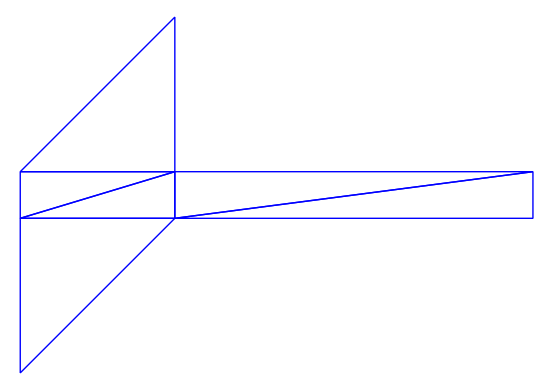

In [4]:
#prym = Triangulation.prym_eigenform_type_aplus(2, 1, 0, -1)
#prym = Triangulation.prym_eigenform_type_aminus(2, 1, 0, -1)
L = Triangulation.ronen_l(44)
L.plot().show(axes=False)

Find the Veech group generators, print an element will use in the algorithm, find periodic points.

In [7]:
veech_gens = L.generators_veech.gens
len(veech_gens)

44

In [8]:
veech_elem = veech_gens[4]*veech_gens[3]
print(veech_elem)

[  5/2*a + 12    -3*a - 11]
[-19/22*a - 5        a + 5]


In [9]:
candidate_points = set()
print("There are ", len(L.triangles), " triangles in the table.")
for i in range(len(L.triangles)):
    print("Computing for triangle ", i)
    tri_points = L.compute_candidate_periodic_points(i, veech_elem)
    for point in tri_points:
        reformatted = (i, point)
        candidate_points.add(reformatted)
print("finished.")
print("number candidate points: ", len(candidate_points))

There are  6  triangles in the table.
Computing for triangle  0
Computing for triangle  1
Computing for triangle  2
Computing for triangle  3
Computing for triangle  4
Computing for triangle  5
finished.
number candidate points:  641


Plot the result.

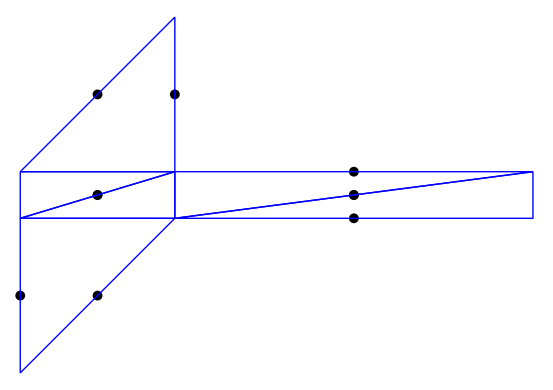

The preserved points are  {(4, (0, 1/2, 1/2)), (0, (0, 1/2, 1/2)), (2, (0, 1/2, 1/2)), (3, (0, 1/2, 1/2)), (5, (0, 1/2, 1/2)), (2, (1/2, 0, 1/2)), (4, (1/2, 1/2, 0)), (3, (1/2, 0, 1/2)), (1, (0, 1/2, 1/2))}


In [10]:
# this block runs the algorithm on all elements of the veech generators list to reduce to periodic points.
veech_gens = remove_duplicates(veech_gens)
preserved_pts = reduce_periodic_points(L, candidate_points, veech_gens)
mark_points(L, preserved_pts).plot().show(axes=False)
print("The preserved points are ", preserved_pts)

Note that if the above program for computing candidate periodic points ever lags, then this can be fixed by taking products of matrices in the veech group, or different matrices.